# The Helmholtz equation


An equation that appears in multiple setting when doing quantum chemistry is the The Helmholtz equation. For instance
it hides within the Scrodinger equation, Kohn--Sham equations and the Hartree--Fock equations.
It is usually written in its differentail form

\begin{align*}
    (\nabla^2 - \mu^2)g(\mathbf{x}) = -f(\mathbf{x})
\end{align*}

with $\mu > 0$ is a non-negative real number, $\nabla^2 = d^2/dx^2 + d^2/dy^2 + d^2/dz^2$ is the [Laplace Operator](https://en.wikipedia.org/wiki/Laplace_operator).
The solution can be written in terms of the convolution integral

\begin{align*}
    g(\mathbf{x}) = \int H(\mathbf{x} - \mathbf{y}) \, d  \mathbf{y}  = \hat{H}[f](\mathbf{x})
\end{align*}
where $H$ is the Hemholtz kernel
\begin{align*}
    H(\mathbf{x}) = \frac{e^{-\mu ||\mathbf{x} - \mathbf{y}||}}{4 \pi ||\mathbf{x} - \mathbf{y}||}
\end{align*}
and $\hat{H}$ is the corresponding Helmholtz operator.

To show how we do this in vampyr we make a source test. We start by picking the solution $g$ as,
\begin{align*}
    g(\mathbf{x}) = \exp(-x^2 - y^2 - z^2)
\end{align*}
then based upon our pick $g$ we calcualte $f$, *the source*, to be
\begin{align*}
    f(\mathbf{x}) = (\nabla^2 - \mu^2) g(\mathbf{x}) = - (4x^2 + 4y^2 + 4z^2 + 6 + \mu^2) \exp(-x^2 - y^2 - z^2)
\end{align*}
next we'll project $f$ onto an MRA in vampyr, then we'll apply the Helmholtz operator onto it to caluclate an approximation to $g$,
then we'll compare our approximation of $g$ to the exact representation. 

In [1]:
# The Helmholtz operator is a 3 dimensional operator so we use vampyr3d
from vampyr import vampyr3d as vp3
import numpy as np

import matplotlib.pyplot as plt

# Set the precision and make the MRA
prec = 1.0e-3
mra = vp3.MultiResolutionAnalysis(box=[-20, 20], order=5)

# Make the scaling projector
P_eps = vp3.ScalingProjector(mra, prec)

# Define mu and make the Helmholtz operator 
mu = 1.0
helmholtz_operator = vp3.HelmholtzOperator(mra, mu, prec)


# Define the analytical source term f
def f(x):
    return -2.0*(2.0*x[0]**2 + 2.0*x[1]**2 + 2.0*x[2]**2 - 3.0 - mu**2/2) * np.exp(-x[0]**2 - x[1]**2 - x[2]**2)

# Define the analytical solution reference g
def g(x):
    return np.exp(-x[0]**2 - x[1]**2 - x[2]**2)

# Use the projector to project the function onto a function_tree
f_tree = P_eps(f)

# Apply the helmholtz operator onto f_tree
g_tree = helmholtz_operator(f_tree)

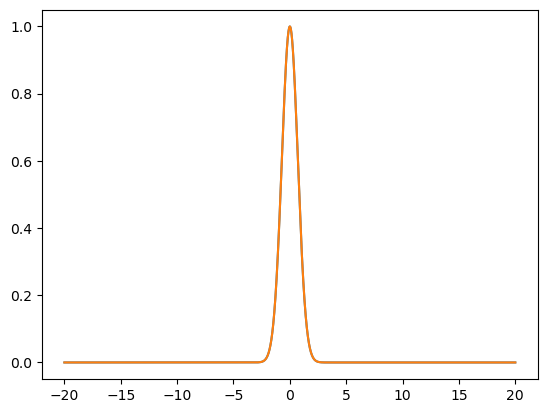

In [2]:
# One way to compare g_tree to the analytical reference is to plot them together

x = np.arange(-20, 20, 0.001)
y = [g_tree([_, 0.0, 0.0]) for _ in x]
y1= [g([_, 0.0, 0.0]) for _ in x]

plt.plot(x, y)
plt.plot(x, y1)
plt.show()

# An exercise is to modify the code and plot the relative difference along the same line

In [3]:
# A problem with that comparrison is that we only see a line in 3D space. Another
# purhaps better way to compare the accuray of g_tree and g is to project g onto
# a function_tree g_tree_reference. Then calcualte the norm of g_tree - g_tree_reference

# An exercise is to see how the square norm decreases when the precision is increased.

g_tree_reference = P_eps(g)

print("g_tree - g_tree_reference square norm:", (g_tree - g_tree_reference).norm())

g_tree - g_tree_reference square norm: 0.00044356533974258583
